## "You get what you pay for."  The underlying assumption of this well known idiom suggests that when a product costs more, it has a higher value.  In this Jupyter Notebook, we explore the validity of this idiom with regards to healthcare spending.  In other words, does increased healthcare spending result in better health outcomes?  To examine this question, we will draw upon data supplied by the CIA's [World Factbook](https://www.cia.gov/library/publications/the-world-factbook/rankorder/rankorderguide.html).

### First, import the usual data science libraries along with other housekeeping tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
%load_ext blackcellmagic

### Let's create a dataframe pct_gdp_healthcare which contains columns of different countries with the respective percentage of GDP each country spends on healthcare.

In [2]:
pct_gdp_healthcare = pd.read_csv(
    filepath_or_buffer="data/health_pct_gdp.txt",
    usecols=[1, 2],
    names=["country", "pct_gdp_health"],
    sep="\s{2,}",
    engine="python",
)
pct_gdp_healthcare.head()


,country,pct_gdp_health
0,United States,17.1
1,Marshall Islands,17.1
2,Tuvalu,16.5
3,Maldives,13.7
4,"Micronesia, Federated States of",13.7


### Let's examine the percent of GDP spent on healthcare by the top 20 countries.

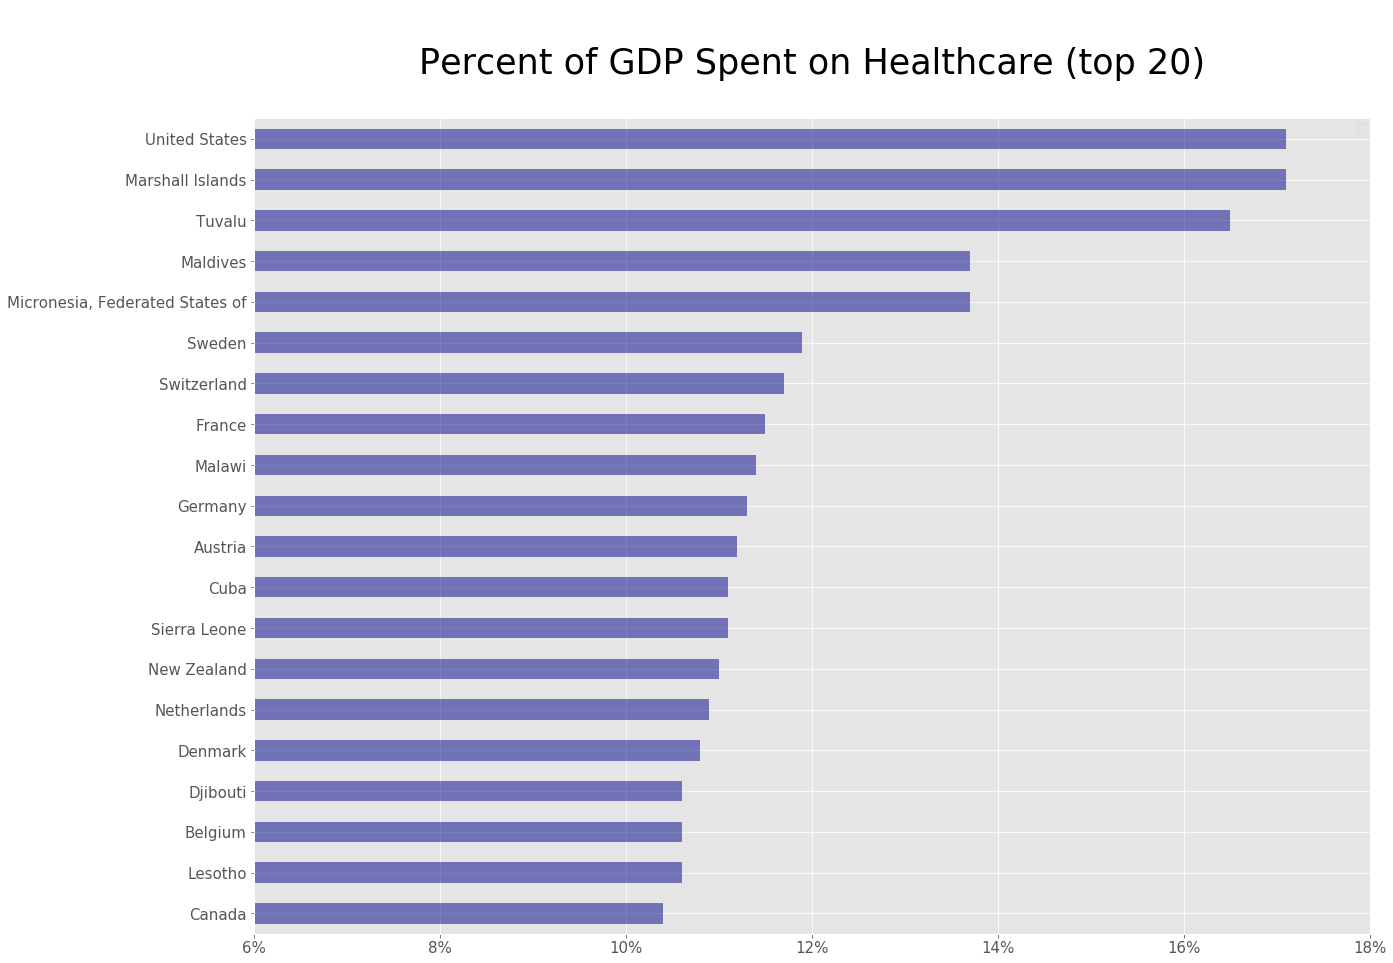

In [3]:
ax = (
    pct_gdp_healthcare.set_index("country")
    .sort_values(by="pct_gdp_health")[-20:]
    .plot.barh(figsize=(20, 15), fontsize=15, color="darkblue", alpha=0.5)
)
ax.set_xlim(6, 18)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}%"))
ax.set_ylabel("")
ax.set_title("\nPercent of GDP Spent on Healthcare (top 20)\n", fontsize=35)
ax.legend("");


### Let's next create a dataframe life_expectancy that includes columns of countries and their respective life expectancies in years.

In [4]:
life_expectancy = pd.read_csv(
    filepath_or_buffer="data/life_expectancy.txt",
    usecols=[1, 2],
    names=["country", "life_expectancy"],
    sep="\s{2,}",
    engine="python",
)
life_expectancy.head()


,country,life_expectancy
0,Monaco,89.4
1,Japan,85.3
2,Singapore,85.2
3,Macau,84.6
4,San Marino,83.3


### Merge these 2 dataframes into a single dataframe life_and_pct_gdp_healthcare.

In [5]:
life_and_pct_gdp_healthcare = life_expectancy.merge(pct_gdp_healthcare, on="country")
life_and_pct_gdp_healthcare.head()


,country,life_expectancy,pct_gdp_health
0,Monaco,89.4,4.3
1,Japan,85.3,10.2
2,Singapore,85.2,4.9
3,San Marino,83.3,6.1
4,Iceland,83.1,8.9


### A visual inspection of the scatter plot of the percent of GDP a country spends on healthcare vs life expectancy does not suggest a strong correlation between these 2 values.

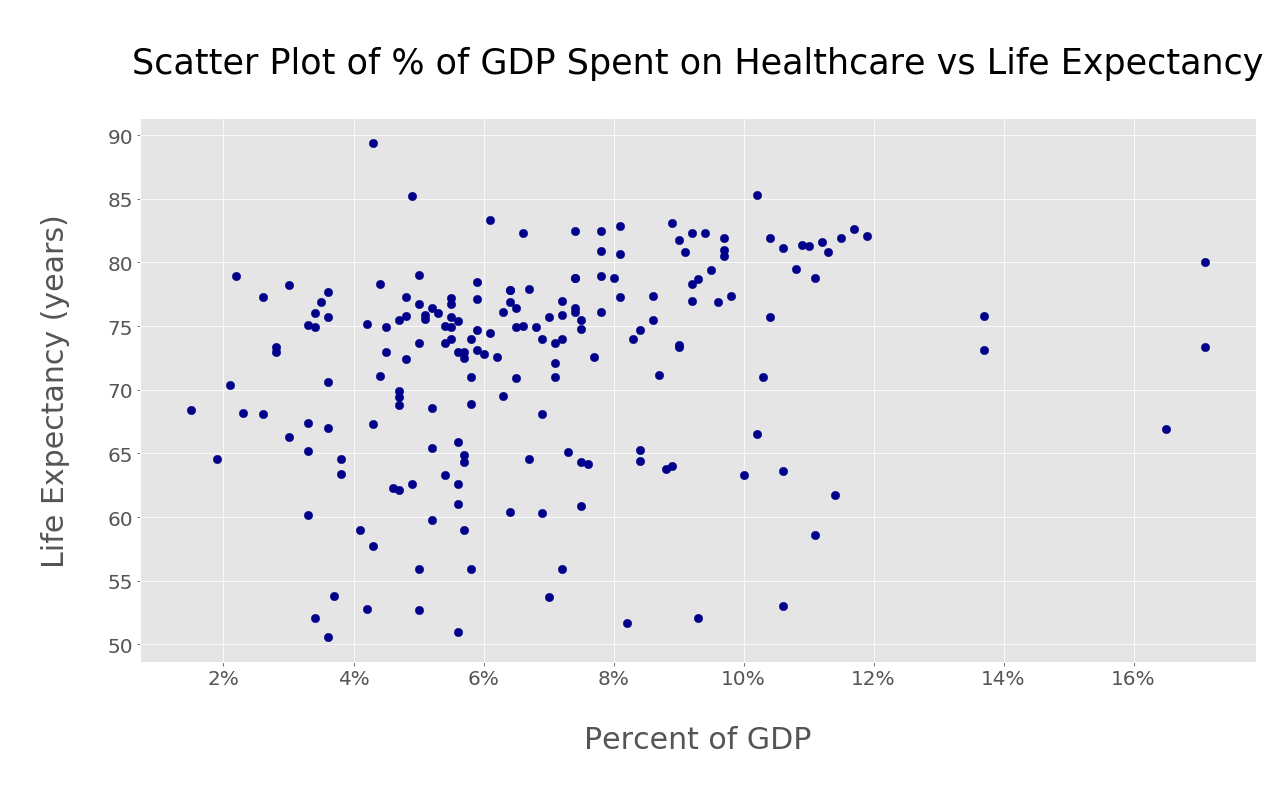

In [6]:
ax = life_and_pct_gdp_healthcare.plot.scatter(
    x="pct_gdp_health",
    y="life_expectancy",
    figsize=(20, 10),
    fontsize=20,
    s=70,
    color="darkblue",
)
ax.set_title(
    "\nScatter Plot of % of GDP Spent on Healthcare vs Life Expectancy\n", fontsize=35
)
ax.set_xlabel("\nPercent of GDP\n", fontsize=30)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}%"))
ax.set_ylabel("\nLife Expectancy (years)\n", fontsize=30);


### In more precise terms, the correlation coefficient between these 2 measurements is 0.243 suggesting a statistically weak correlation.

In [7]:
corr_coef = round(life_and_pct_gdp_healthcare.corr().iloc[0, 1], 3)
print(
    f"The correlation coefficient between % of GDP spent on healthcare "
    f"and life expectancy is {corr_coef}."
)


The correlation coefficient between % of GDP spent on healthcare and life expectancy is 0.243.


### Perhaps instead of using the percent of GDP spent on healthcare, we should use the per capita amount (in US dollars) spent on healthcare.  This figure is not directly available on the CIA World Factbook site, but may be derived by multiplying the percent of GDP spent on healthcare by the GDP per capita for each country.  First, we create the dataframe gdp_per_cap containing data on each country's GDP per capita.

In [8]:
gdp_per_cap = pd.read_csv(
    filepath_or_buffer="data/gdp_per_capita.txt",
    usecols=[1, 2],
    names=["country", "gdp_per_capita"],
    sep="\s{2,}",
    engine="python",
)
gdp_per_cap.head()


,country,gdp_per_capita
0,Liechtenstein,"$139,100"
1,Qatar,"$124,900"
2,Monaco,"$115,700"
3,Macau,"$114,400"
4,Luxembourg,"$109,100"


### The gdp_per_capita column must be converted to numeric form.

In [9]:
gdp_per_cap["gdp_per_capita"] = gdp_per_cap.gdp_per_capita.str.replace(
    pat="[^0-9]", repl=""
).astype(int)
gdp_per_cap.head()


,country,gdp_per_capita
0,Liechtenstein,139100
1,Qatar,124900
2,Monaco,115700
3,Macau,114400
4,Luxembourg,109100


### Merge the pct_gdp_healthcare and gdp_per_cap dataframes into a single dataframe healthcare_spending.

In [10]:
healthcare_spending = pct_gdp_healthcare.merge(gdp_per_cap, on="country")   
healthcare_spending.head()

,country,pct_gdp_health,gdp_per_capita
0,United States,17.1,59500
1,Marshall Islands,17.1,3400
2,Tuvalu,16.5,3800
3,Maldives,13.7,19200
4,"Micronesia, Federated States of",13.7,3400


### And multiply the 2 numeric columns to produce the annual per capita amount spent on healthcare.

In [11]:
healthcare_spending["healthcare_spending_per_capita"] = (
    healthcare_spending.pct_gdp_health / 100 * healthcare_spending.gdp_per_capita
)
healthcare_spending.head()


,country,pct_gdp_health,gdp_per_capita,healthcare_spending_per_capita
0,United States,17.1,59500,10174.5
1,Marshall Islands,17.1,3400,581.4
2,Tuvalu,16.5,3800,627.0
3,Maldives,13.7,19200,2630.4
4,"Micronesia, Federated States of",13.7,3400,465.8


### We can drop the pct_gdp_health and gdp_per_capita columns for the remainder of the analyses.

In [12]:
healthcare_spending.drop(
    labels=["pct_gdp_health", "gdp_per_capita"], axis=1, inplace=True
)
healthcare_spending.head()


,country,healthcare_spending_per_capita
0,United States,10174.5
1,Marshall Islands,581.4
2,Tuvalu,627.0
3,Maldives,2630.4
4,"Micronesia, Federated States of",465.8


### Let's examine per capita spending on healthcare by the top 20 countries.

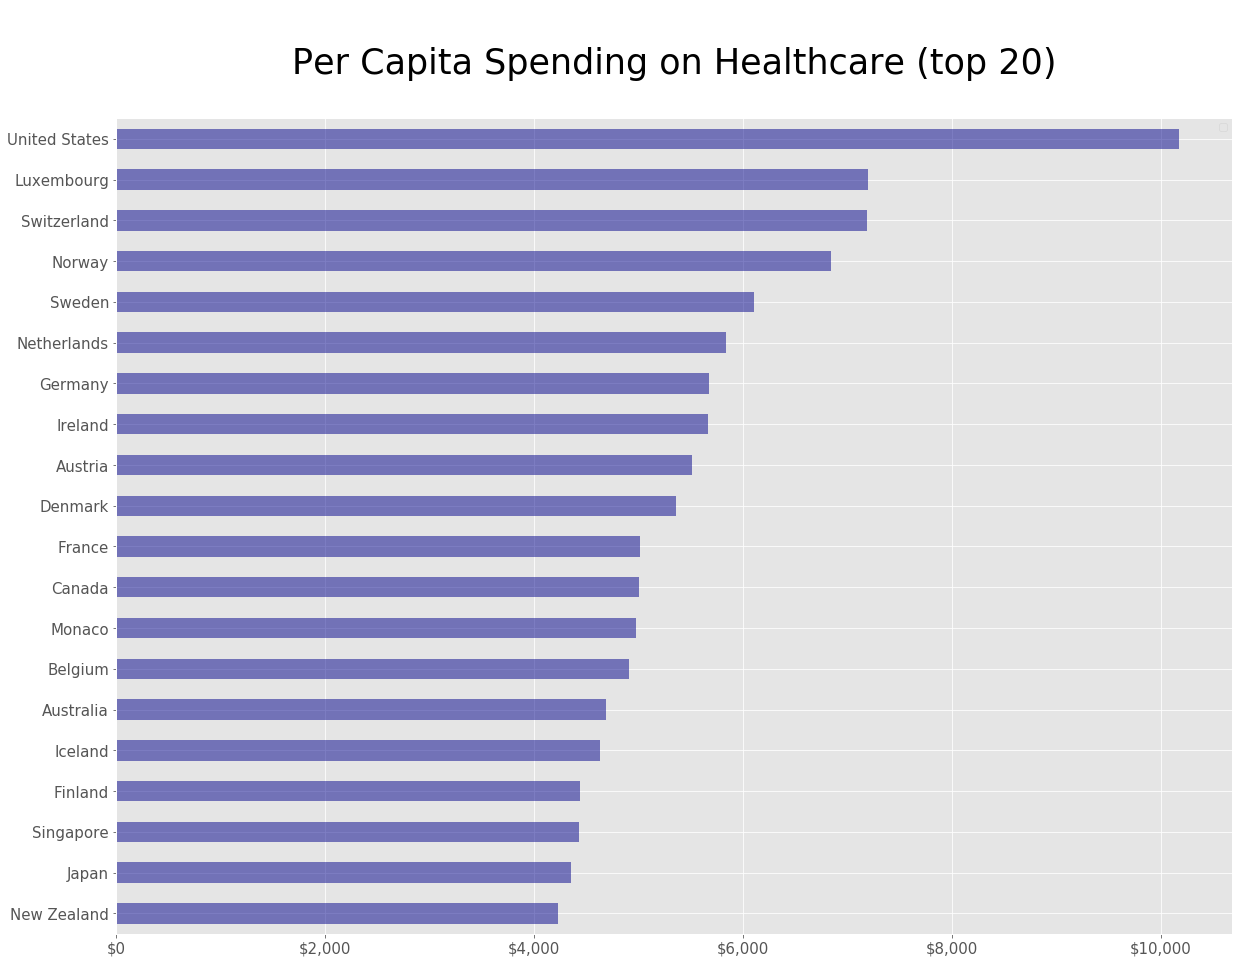

In [13]:
ax = (
    healthcare_spending.set_index("country")
    .sort_values(by="healthcare_spending_per_capita")[-20:]
    .plot.barh(figsize=(20, 15), fontsize=15, color="darkblue", alpha=0.5)
)
ax.xaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))
ax.set_ylabel("")
ax.set_title("\nPer Capita Spending on Healthcare (top 20)\n", fontsize=35)
ax.legend("");


### Next, let's turn our attention towards evaluating the correlation between per capita healthcare spending and health outcomes.  We'll start with life expectancy.  Let's first merge the dataframes life_expectancy and healthcare_spending.

In [14]:
merged_life_exp_and_spending = life_expectancy.merge(healthcare_spending, on="country")
merged_life_exp_and_spending.head()

,country,life_expectancy,healthcare_spending_per_capita
0,Monaco,89.4,4975.1
1,Japan,85.3,4355.4
2,Singapore,85.2,4434.5
3,San Marino,83.3,3629.5
4,Iceland,83.1,4636.9


### We'll be creating similar dataframes for other health outcomes.  Let's create a function to visualize a scatter plot of healthcare spending per capita vs the health outcome.

In [15]:
def produce_scatter_plot_of_spending_vs_outcome(
    dataframe: pd.DataFrame, outcome: str
) -> None:
    ax = dataframe.plot.scatter(
        x="healthcare_spending_per_capita",
        y=dataframe.columns[1],
        figsize=(20, 10),
        fontsize=20,
        s=70,
        color="darkblue",
    )
    ax.set_title(
        f"\nScatter Plot of Healthcare Spending per Capita vs {outcome}\n", fontsize=35
    )
    ax.set_xlabel("\nHealthcare Spending Per Capita\n", fontsize=30)
    ax.set_ylabel(f"\n{outcome}\n", fontsize=30)
    ax.xaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))


### Let's look at the scatterplot of healthcare spending per capita vs life expectancy.  The relationship between these 2 values does not appear linear.

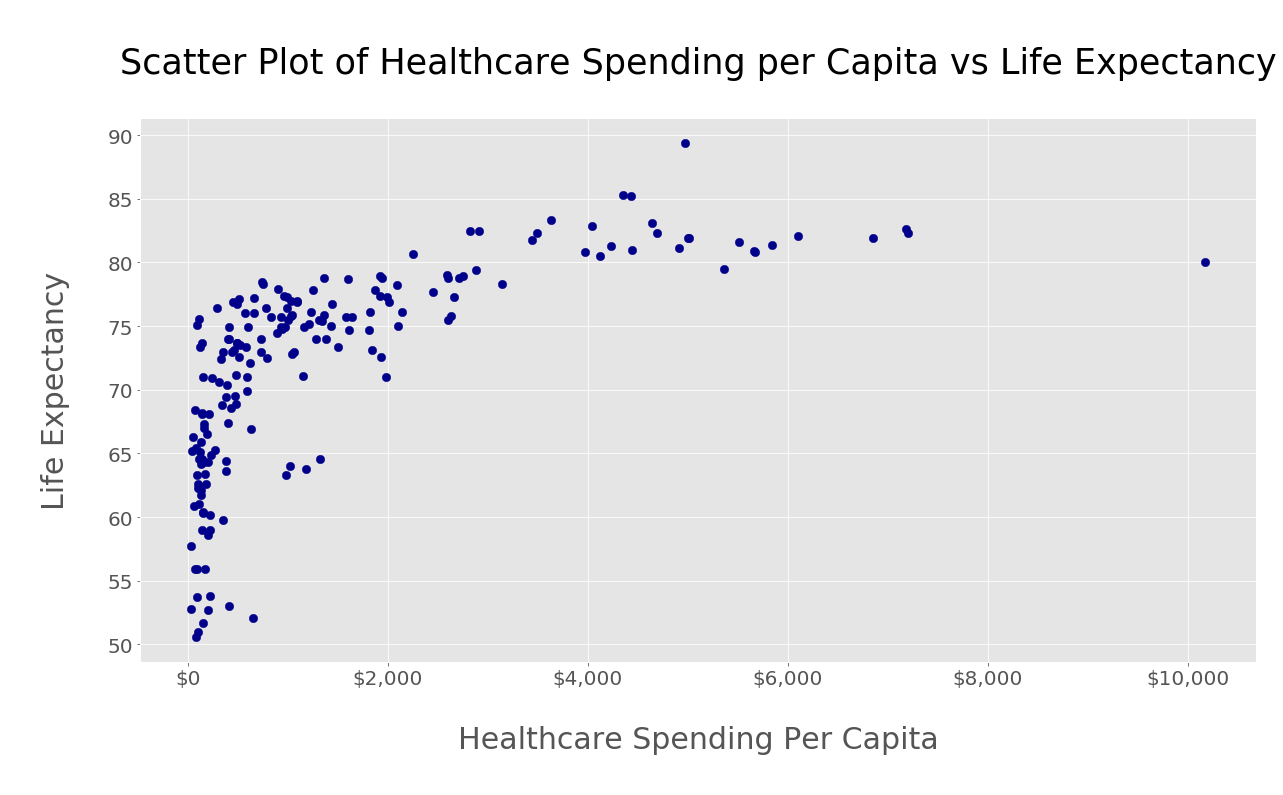

In [16]:
produce_scatter_plot_of_spending_vs_outcome(
    dataframe=merged_life_exp_and_spending, outcome="Life Expectancy"
)

### If we were to assume a linear relationship between healthcare spending per capita and life expectancy, we may conclude a moderate (approaching strong) correlation between these 2 values (r = 0.657).

In [17]:
corr_coef = round(
    merged_life_exp_and_spending[["life_expectancy", "healthcare_spending_per_capita"]]
    .corr()
    .iloc[0, 1],
    3,
)
print(
    f"The correlation coefficient between healthcare spending "
    f"per capita and life expectancy would be {corr_coef}\n"
    f"if one were to assume a linear relationship."
)


The correlation coefficient between healthcare spending per capita and life expectancy would be 0.657
if one were to assume a linear relationship.


### However, visualizing the scatter plot above does not suggest a simple linear relationship is present.  At some value of healthcare spending per capita, there appears to be no associated increase in life expectancy.  That value (as determined in the cell below) appears to be \$2,750. A weakly positive correlation is first noted at \$2,600.

In [18]:
weak_correlation = -1
no_correlation = -1
for spending in np.arange(0, 10000, 25):
    corr_coef = (
        merged_life_exp_and_spending[
            merged_life_exp_and_spending.healthcare_spending_per_capita >= spending
        ]
        .corr()
        .iloc[0, 1]
    )
    if corr_coef <= 0.3 and weak_correlation == -1:
        weak_correlation = spending
    if corr_coef <= 0:
        no_correlation = spending
        break

print(
    f"Life expectancy becomes weakly correlated (r <= 0.3) "
    f"with annual healthcare spending above ${weak_correlation:,} per capita."
)
print()
print(
    f"There is no correlation between life expectancy and annual "
    f"healthcare spending above ${no_correlation:,} per capita."
)


Life expectancy becomes weakly correlated (r <= 0.3) with annual healthcare spending above $2,600 per capita.

There is no correlation between life expectancy and annual healthcare spending above $2,750 per capita.


### Let's turn our attention towards another health outcome, maternal mortality.   Let's create a dataframe maternal_mortality (and clean up the numeric column).

In [19]:
maternal_mortality = pd.read_csv(
    filepath_or_buffer="data/maternal_mortality.txt",
    usecols=[1, 2],
    names=["country", "maternal_mortality_per_100K"],
    sep="\s{2,}",
    engine="python",
)
maternal_mortality[
    "maternal_mortality_per_100K"
] = maternal_mortality.maternal_mortality_per_100K.str.replace(
    pat="[^0-9]", repl=""
).astype(
    int
)
maternal_mortality.head()


,country,maternal_mortality_per_100K
0,Sierra Leone,1360
1,Central African Republic,882
2,Chad,856
3,Nigeria,814
4,South Sudan,789


### Merge the maternal_mortality and healthcare_spending dataframes.

In [20]:
maternal_and_spending = maternal_mortality.merge(healthcare_spending, on="country")
maternal_and_spending.head()

,country,maternal_mortality_per_100K,healthcare_spending_per_capita
0,Sierra Leone,1360,199.8
1,Central African Republic,882,29.4
2,Chad,856,86.4
3,Nigeria,814,218.3
4,South Sudan,789,16.2


### Let's look at a scatterplot to visualize the association between healthcare spending and maternal mortality.

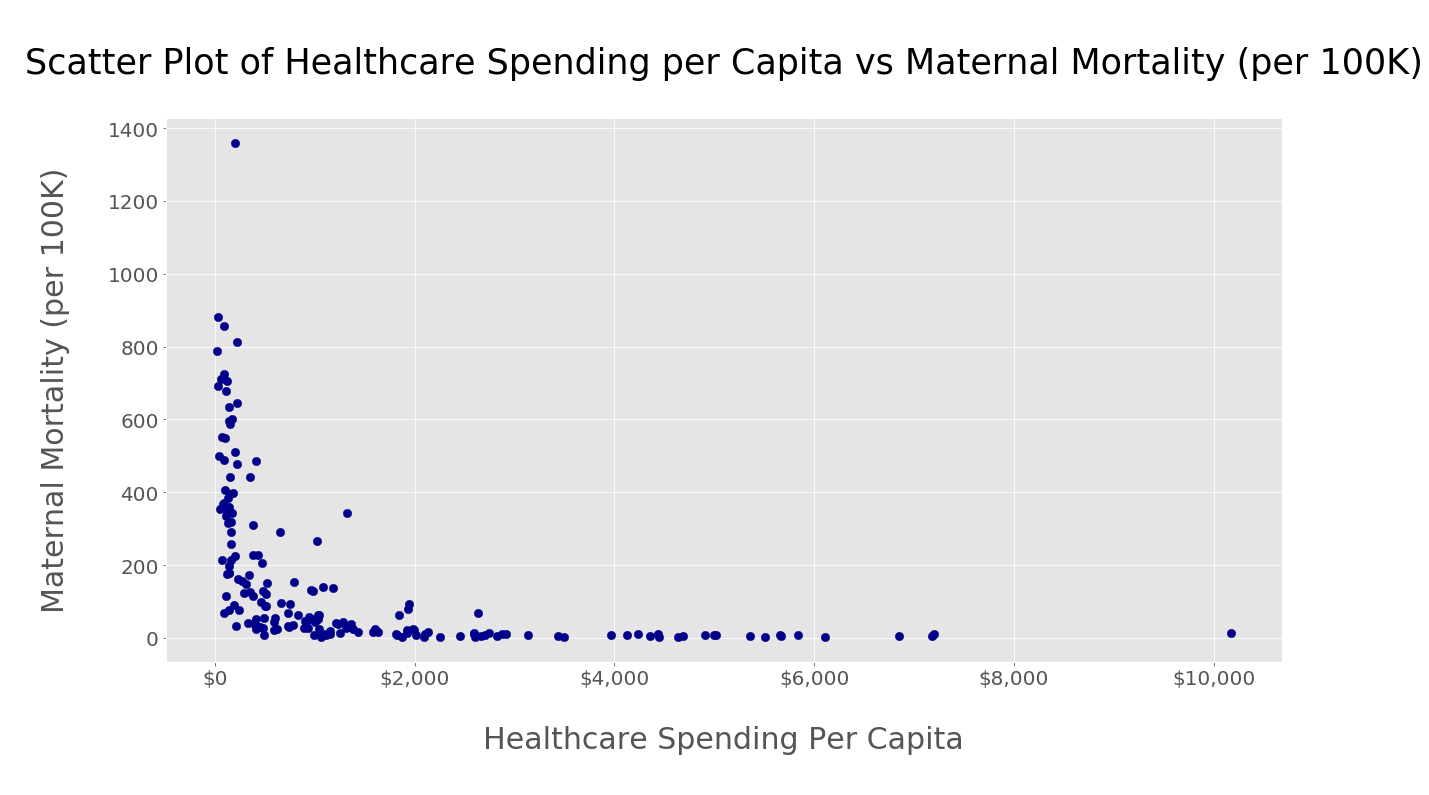

In [21]:
produce_scatter_plot_of_spending_vs_outcome(
    dataframe=maternal_and_spending, outcome="Maternal Mortality (per 100K)"
)


### As was the case for life expectancy, there does not appear to be a linear association between healthcare spending and maternal mortality.  In the cell below we determine at which value of annual healthcare spending further increases do not appear to be correlated with lower maternal mortality (\$2,600).  A weak correlation appears to first appear at an annual per capita healthcare spending of \$1,050.

In [22]:
weak_correlation = -1
no_correlation = -1
for spending in np.arange(0, 10000, 25):
    corr_coef = (
        maternal_and_spending[
            maternal_and_spending.healthcare_spending_per_capita >= spending
        ]
        .corr()
        .iloc[0, 1]
    )
    if corr_coef >= -0.3 and weak_correlation == -1:
        weak_correlation = spending
    if corr_coef >= 0:
        no_correlation = spending
        break

print(
    f"Maternal becomes weakly negatively correlated (r >= -0.3) "
    f"with healthcare spending above ${weak_correlation:,} per person per year."
)
print()
print(
    f"There is no correlation between maternal mortality and "
    f"healthcare spending above ${no_correlation:,} per person per year."
)


Maternal becomes weakly negatively correlated (r >= -0.3) with healthcare spending above $1,050 per person per year.

There is no correlation between maternal mortality and healthcare spending above $2,650 per person per year.


### Let's turn our attention towards a third commonly measured health outcome, infant mortality (in the first year of life per 1000 live births).   Let's create a dataframe infant_mortality.

In [23]:
infant_mortality = pd.read_csv(
    filepath_or_buffer="data/infant_mortality.txt",
    usecols=[1, 2],
    names=["country", "infant_mortality_per_1000"], 
    sep="\s{2,}",
    engine="python",
)
infant_mortality.head()

,country,infant_mortality_per_1000
0,Afghanistan,110.6
1,Somalia,94.8
2,Central African Republic,86.3
3,Guinea-Bissau,85.7
4,Chad,85.4


### Merge the infant_mortality and the healthcare_spending dataframes.

In [24]:
infant_and_spending = infant_mortality.merge(healthcare_spending, on="country")
infant_and_spending.head()

,country,infant_mortality_per_1000,healthcare_spending_per_capita
0,Afghanistan,110.6,155.8
1,Central African Republic,86.3,29.4
2,Guinea-Bissau,85.7,100.8
3,Chad,85.4,86.4
4,Niger,81.1,69.6


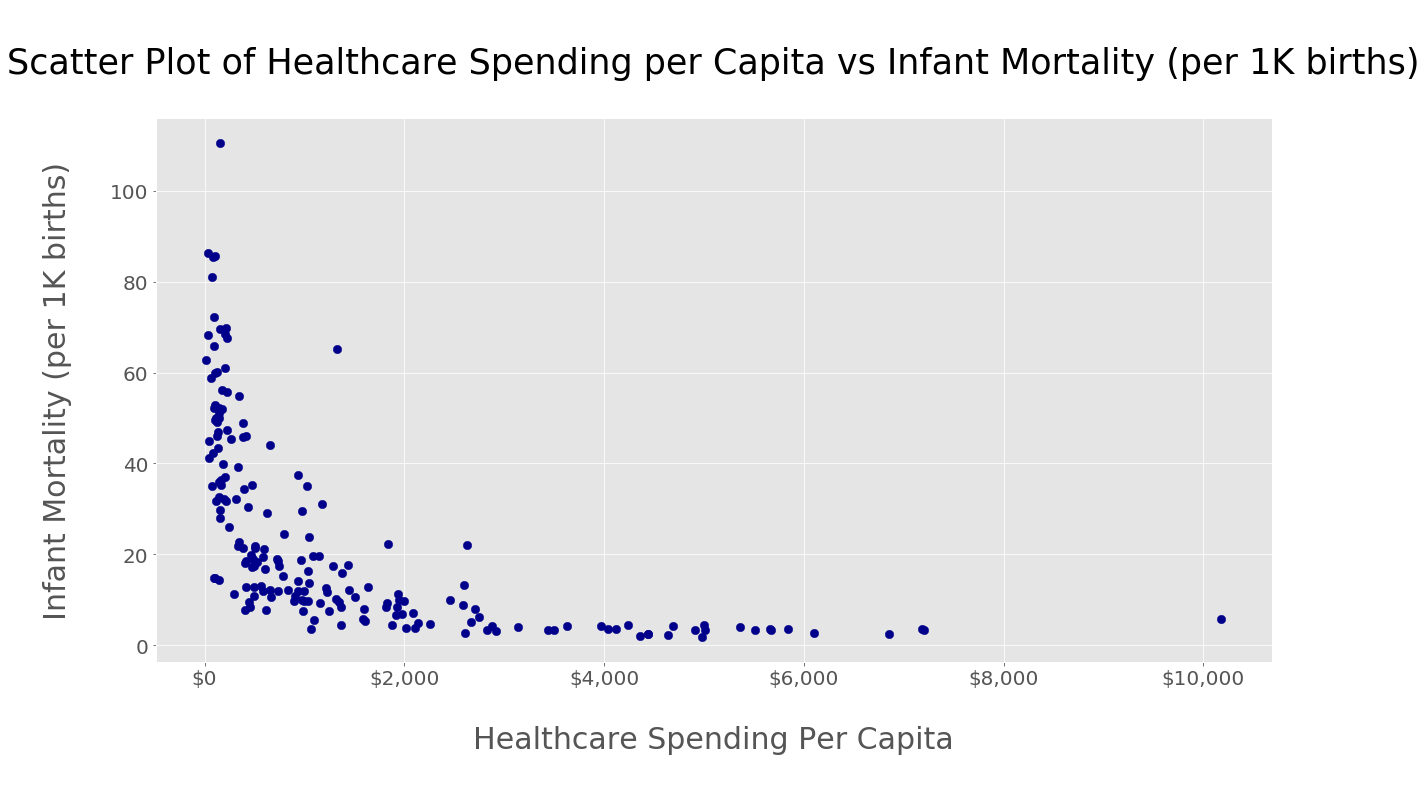

In [25]:
produce_scatter_plot_of_spending_vs_outcome(
    dataframe=infant_and_spending, outcome="Infant Mortality (per 1K births)"
)


### Again, there does not appear to be a linear association between healthcare spending and infant mortality.  In the cell below we determine at which value of annual healthcare spending further increases do not appear to be correlated with lower infant mortality (\$2,750).  A weak correlation appears to first appear at an annual per capita healthcare spending of \$2,600.

In [26]:
weak_correlation = -1
no_correlation = -1
for spending in np.arange(0, 10000, 25):
    corr_coef = (
        infant_and_spending[infant_and_spending.healthcare_spending_per_capita >= spending]
        .corr().iloc[0, 1]
    )
    if corr_coef >= -0.3 and weak_correlation == -1:
        weak_correlation = spending
    if corr_coef >= 0:
        no_correlation = spending
        break
        
print(f"Infant mortality becomes weakly negatively correlated (r >= -0.3) "
      f"with healthcare spending above ${weak_correlation:,} per person\nper year.")
print()
print(f"There is no correlation between infant mortality and "
      f"healthcare spending above ${no_correlation:,} per person per year.")

Infant mortality becomes weakly negatively correlated (r >= -0.3) with healthcare spending above $2,600 per person
per year.

There is no correlation between infant mortality and healthcare spending above $2,725 per person per year.


## For each of the 3 most commonly used measurements of health outcomes (life expectancy, maternal mortality and infant mortality) a simple linear relationship between a country's annual per capita healthcare spending and a better health outcome does not appear to exist.  The annual per capita healthcare spending above which better outcomes do not appear to be correlated is \$2,600-\$2,750.  For reference, the US spends over \$10,000 annually per capita on healthcare.  These findings should at least provoke some thought when making policy decisons regarding healthcare spending in the United States.